In this notebook we will go through each step for this design. This notebook is gonna be long, but it will explain every step through the design.

### Steps:

1. Design RLC circuit, similar to the one in the paper
2. Try to replicate the results of the paper
3. Add the third branch (NA)
4. Add the nonlinearity in different ways:
    1. Same place but function of Vm alone, or combinaiton of Vm and V_NA, or I_stim
    2. at different places
5. Understand why an RLC circuit does not integrate the voltage from a supply with nonlinearity.

import useful libraries

In [3]:
import functions as fn
import numpy as np
import matplotlib.pyplot as plt

Simulation parameters

In [4]:
Sim_period = 50  # seconds
Sim_fs   = 10000  # samples per seconds

Sim_dt = 1/Sim_fs
Sim_t = np.arange(0,Sim_period,Sim_dt)

## Circuit design #1

In [70]:
R_leak = 1e8
g_leak = 1 / R_leak
R_L = 1e4
g_L = 1 / R_L
L = 2500
C = .0000001 
V_leak = 0
V_Na = 140

I_stim = 1

tau_L = L / R_L # * 1e3, because we want it in milisecond
tau_C = 1 / (C * R_leak)

print('Inductor time constant:', tau_L, 's')
print('Capacitor time constant:', tau_C, 's')
print('Resonance frequency:', 1/(2*np.pi*np.sqrt(L*C)), 'Hz')
print('Quality factor:', R_leak * np.sqrt(C/L))

Inductor time constant: 0.25 s
Capacitor time constant: 0.1 s
Resonance frequency: 10.065842420897408 Hz
Quality factor: 632.4555320336758


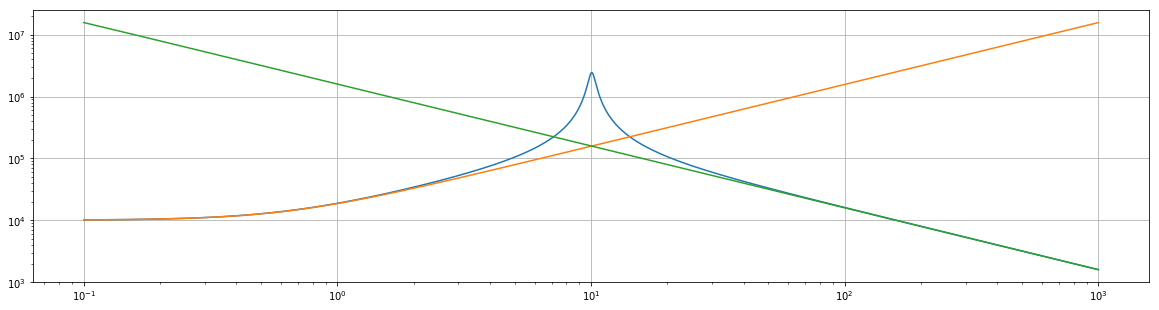

In [71]:
f = np.arange(.1,1000,.01)  # Hz
w = 2 * np.pi * f

R_L = 1 / g_L
R_leak = 1 / g_leak

z = (g_leak + 1j*w*C + 1/(1j*w*L + R_L)) ** -1
z_amp = np.sqrt(z.real**2 + z.imag**2)

z_L = 1j * w * L + R_L
z_L_amp = np.sqrt(z_L.real**2 + z_L.imag**2)

z_C = (1j * w * C + g_leak) ** -1
z_C_amp = np.sqrt(z_C.real**2 + z_C.imag**2)

plt.figure(figsize=(20,5))
plt.loglog(f, z_amp)
plt.loglog(f, z_L_amp)
plt.loglog(f, z_C_amp)
plt.grid()
plt.show()

In [72]:
I = I_stim * np.ones(Sim_t.shape)  # pA

# slope
slope = fn.gen_slope(init_time=0,
                   end_time= 1,
                   time_points=Sim_t)


I1 = fn.gen_sin(init_time=0,
                freq=1000,
                phase=0,
                time_points=Sim_t)
I2 = fn.gen_sin(init_time=0,
                freq=1000.1,
                phase=0,
                time_points=Sim_t)

I = slope * I_stim * (I1 + I2)

# I1 = fn.gen_pulse(init_time=1000,
#                  on_width=100, # width of "ON" state
#                  off_width=100, # width of "OFF" state
#                  time_points=Sim_t)

# I2 = fn.gen_pulse(init_time=1000,
#                  on_width=1000, # width of "ON" state
#                  off_width=1000, # width of "OFF" state
#                  time_points=Sim_t)

# I = I_stim * I1 * I2

# Chirp stimulation
out, freq = fn.gen_chirp(Chirp_init_freq=.01, 
                         Chirp_init_time=0, 
                         Chirp_end_freq=20, 
                         Chirp_end_time=Sim_t[-1], 
                         time_points=Sim_t)

I      = I_stim * out  # pA

In [5]:
Vm = np.zeros(Sim_t.shape)
I_L = np.zeros(Sim_t.shape)
Boltzman_nl = np.zeros(Vm.shape)

In [74]:
for i in range(I.shape[0]-1):
       
    # current through the leak branch
    I_leak = g_leak * (Vm[i] - V_leak)
    
    # current through the inductor
    I_L_ss = Vm[i] * g_L
    dILdt = (I_L_ss - I_L[i]) / tau_L
    I_L[i+1] = I_L[i] + dILdt * Sim_dt
    
#     I_L[i+1] = 0
#     I_leak = 0
    
    dVmdt = (I[i] - I_leak - I_L[i]) / C
    Vm[i+1] = Vm[i] + dVmdt * Sim_dt

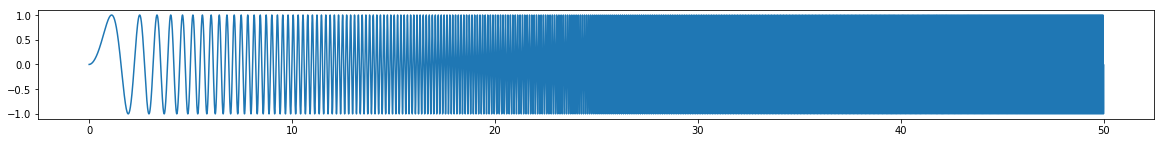

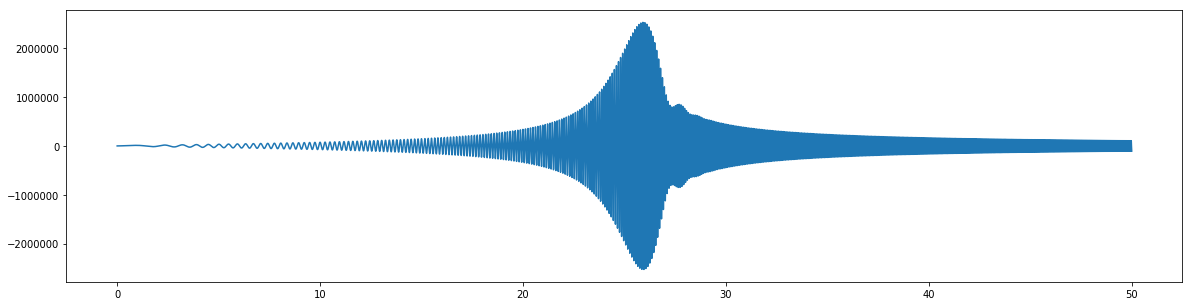

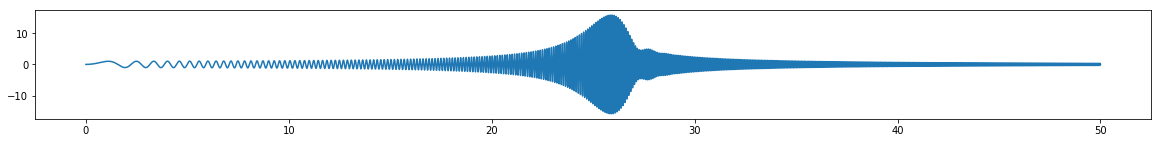

In [75]:
plt.figure(figsize=(20,2))
plt.plot(Sim_t, I)
plt.show()

plt.figure(figsize=(20,5))
plt.plot(Sim_t, Vm)
plt.show()

plt.figure(figsize=(20,2))
plt.plot(Sim_t, I_L)
plt.show()

## Circuit in the paper

In [347]:
R_leak = 56.7e6
g_leak = 1 / R_leak
R_L = 46.1e6 / 2
g_L = 1 / R_L
L = 1260000
C = 3.1e-10 / 1.2
V_leak = 0

I_stim = 1

tau_L = L / R_L # * 1e3, because we want it in milisecond
tau_C = 1 / (C * R_leak)

print('Inductor time constant:', tau_L, 's')
print('Capacitor time constant:', tau_C, 's')
print('Resonance frequency:', 1/(2*np.pi*np.sqrt(L*C)), 'Hz')
print('Quality factor:', R_leak * np.sqrt(C/L))

Inductor time constant: 0.054663774403470713 s
Capacitor time constant: 68.27103601297148 s
Resonance frequency: 8.82154462069331 Hz
Quality factor: 0.8118728348700923


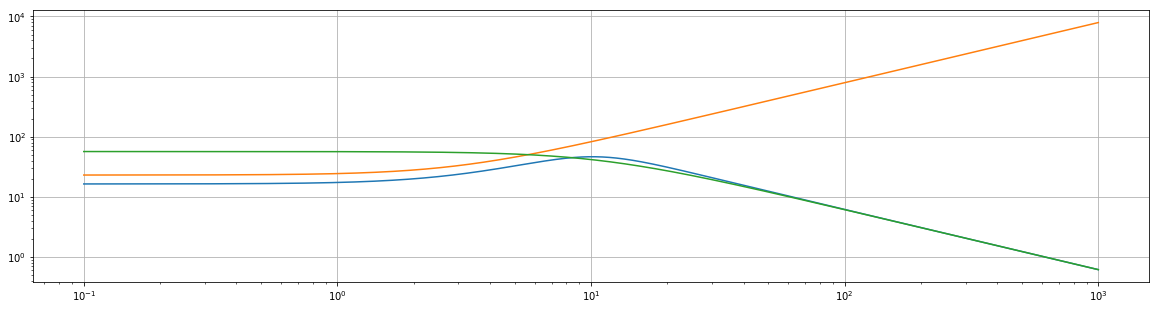

In [348]:
f = np.arange(.1,1000,.01)  # Hz
w = 2 * np.pi * f

R_L = 1 / g_L
R_leak = 1 / g_leak

z = (g_leak + 1j*w*C + 1/(1j*w*L + R_L)) ** -1
z_amp = np.sqrt(z.real**2 + z.imag**2)

z_L = 1j * w * L + R_L
z_L_amp = np.sqrt(z_L.real**2 + z_L.imag**2)

z_C = (1j * w * C + g_leak) ** -1
z_C_amp = np.sqrt(z_C.real**2 + z_C.imag**2)

plt.figure(figsize=(20,5))
plt.loglog(f, z_amp / 1e6)
plt.loglog(f, z_L_amp / 1e6)
plt.loglog(f, z_C_amp / 1e6)
plt.grid()
plt.show()

In [342]:
I = I_stim * np.ones(Sim_t.shape)  # pA

# slope
slope = fn.gen_slope(init_time=0,
                   end_time= 1,
                   time_points=Sim_t)


I1 = fn.gen_sin(init_time=0,
                freq=1000,
                phase=0,
                time_points=Sim_t)
I2 = fn.gen_sin(init_time=0,
                freq=1000.1,
                phase=0,
                time_points=Sim_t)

I = slope * I_stim * (I1 + I2)

# I1 = fn.gen_pulse(init_time=1000,
#                  on_width=100, # width of "ON" state
#                  off_width=100, # width of "OFF" state
#                  time_points=Sim_t)

# I2 = fn.gen_pulse(init_time=1000,
#                  on_width=1000, # width of "ON" state
#                  off_width=1000, # width of "OFF" state
#                  time_points=Sim_t)

# I = I_stim * I1 * I2

# Chirp stimulation
out, freq = fn.gen_chirp(Chirp_init_freq=.01, 
                         Chirp_init_time=0, 
                         Chirp_end_freq=20, 
                         Chirp_end_time=Sim_t[-1], 
                         time_points=Sim_t)

I      = I_stim * out  # pA

In [343]:
for i in range(I.shape[0]-1):
       
    # current through the leak branch
    I_leak = g_leak * (Vm[i] - V_leak)
    
    # current through the inductor
    I_L_ss = Vm[i] * g_L
    dILdt = (I_L_ss - I_L[i]) / tau_L
    I_L[i+1] = I_L[i] + dILdt * Sim_dt
    
#     I_L[i+1] = 0
#     I_leak = 0
    
    dVmdt = (I[i] - I_leak - I_L[i]) / C
    Vm[i+1] = Vm[i] + dVmdt * Sim_dt

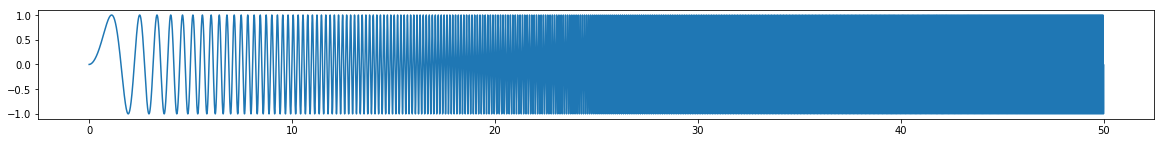

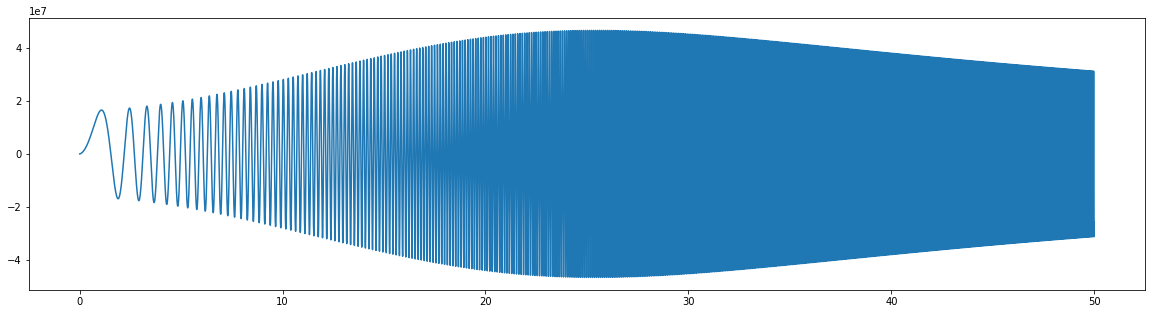

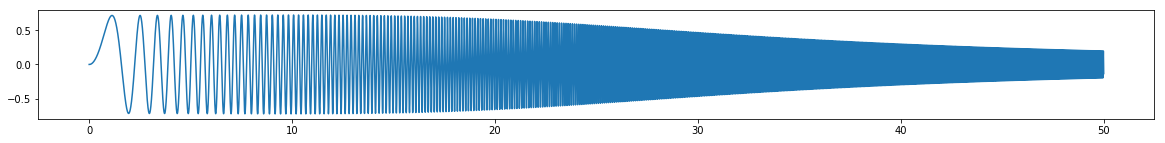

In [344]:
plt.figure(figsize=(20,2))
plt.plot(Sim_t, I)
plt.show()

plt.figure(figsize=(20,5))
plt.plot(Sim_t, Vm)
plt.show()

plt.figure(figsize=(20,2))
plt.plot(Sim_t, I_L)
plt.show()

## Adding the nonlinearity for the stimulation current

In [52]:
R_leak = 1e8
g_leak = 1 / R_leak
R_L = 1e4
g_L = 1 / R_L
L = 2500
C = .0000001 
V_leak = 0

I_stim = 1e-9

tau_L = L / R_L # * 1e3, because we want it in milisecond
tau_C = 1 / (C * R_leak)

print('Inductor time constant:', tau_L, 's')
print('Capacitor time constant:', tau_C, 's')
print('Resonance frequency:', 1/(2*np.pi*np.sqrt(L*C)), 'Hz')
print('Quality factor:', R_leak * np.sqrt(C/L))

Inductor time constant: 0.25 s
Capacitor time constant: 0.1 s
Resonance frequency: 10.065842420897408 Hz
Quality factor: 632.4555320336758


In [78]:
I = I_stim * np.ones(Sim_t.shape)  # pA

# slope
slope = fn.gen_slope(init_time=0,
                   end_time= 1,
                   time_points=Sim_t)


I1 = fn.gen_sin(init_time=0,
                freq=1000,
                phase=0,
                time_points=Sim_t)
I2 = fn.gen_sin(init_time=0,
                freq=1000.1,
                phase=0,
                time_points=Sim_t)

I = slope * I_stim * (I1 + 0)

# I1 = fn.gen_pulse(init_time=5,
#                  on_width=1, # width of "ON" state
#                  off_width=1, # width of "OFF" state
#                  time_points=Sim_t)

# I2 = fn.gen_pulse(init_time=10,
#                  on_width=1, # width of "ON" state
#                  off_width=1, # width of "OFF" state
#                  time_points=Sim_t)

# I = I_stim * I1

# Chirp stimulation
# out, freq = fn.gen_chirp(Chirp_init_freq=.01, 
#                          Chirp_init_time=0, 
#                          Chirp_end_freq=20, 
#                          Chirp_end_time=Sim_t[-1], 
#                          time_points=Sim_t)

# I      = I_stim * out  # pA

In [83]:
for i in range(I.shape[0]-1):
       
    # adding a diode
    I[i] = np.maximum(I[i], 0)
        
    # current through the leak branch
    I_leak = g_leak * (Vm[i] - V_leak)
    
    # current through the inductor
    I_L_ss = Vm[i] * g_L
    dILdt = (I_L_ss - I_L[i]) / tau_L
    I_L[i+1] = I_L[i] + dILdt * Sim_dt
    
#     I_L[i+1] = 0
#     I_leak = 0
    
    dVmdt = (I[i] - I_leak - I_L[i]) / C
    Vm[i+1] = Vm[i] + dVmdt * Sim_dt

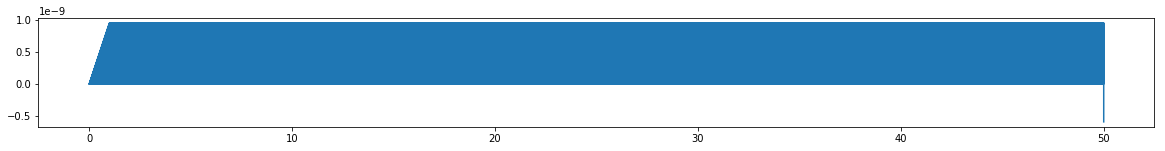

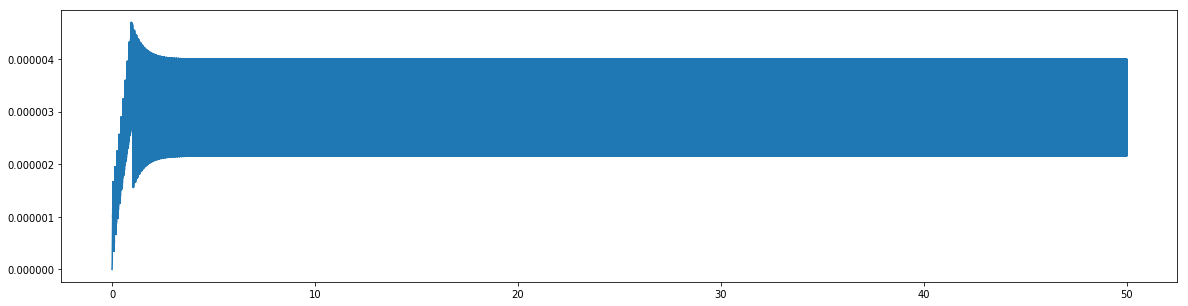

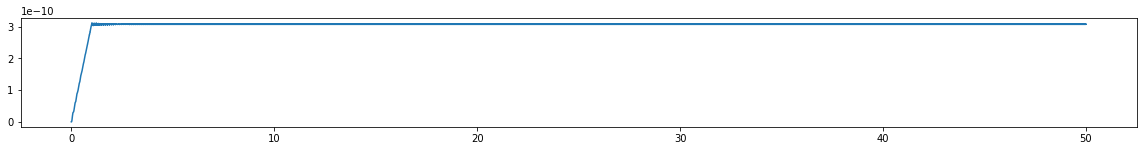

In [84]:
plt.figure(figsize=(20,2))
plt.plot(Sim_t, I)
plt.show()

plt.figure(figsize=(20,5))
plt.plot(Sim_t, Vm)
plt.show()

plt.figure(figsize=(20,2))
plt.plot(Sim_t, I_L)
plt.show()

## Adding the NA branch

In [27]:
R_leak = 1e8
g_leak = 1 / R_leak
R_L = 1e4
g_L = 1 / R_L
L = 2500
C = .0000001 
V_leak = 0

R_Na = 1e9
g_Na = 1 / R_Na
V_Na = 140

I_stim = 1e-6

tau_L = L / R_L # * 1e3, because we want it in milisecond
tau_C = 1 / (C * R_leak)

print('Inductor time constant:', tau_L, 's')
print('Capacitor time constant:', tau_C, 's')
print('Resonance frequency:', 1/(2*np.pi*np.sqrt(L*C)), 'Hz')
print('Quality factor:', R_leak * np.sqrt(C/L))

Inductor time constant: 0.25 s
Capacitor time constant: 0.1 s
Resonance frequency: 10.065842420897408 Hz
Quality factor: 632.4555320336758


In [28]:
I = I_stim * np.ones(Sim_t.shape)  # pA

# slope
slope = fn.gen_slope(init_time=0,
                   end_time= .1,
                   time_points=Sim_t)


I1 = fn.gen_sin(init_time=0,
                freq=1000,
                phase=0,
                time_points=Sim_t)
I2 = fn.gen_sin(init_time=0,
                freq=1000.1,
                phase=0,
                time_points=Sim_t)

I = slope * I_stim * (I1 + 0)

# I1 = fn.gen_pulse(init_time=1000,
#                  on_width=100, # width of "ON" state
#                  off_width=100, # width of "OFF" state
#                  time_points=Sim_t)

# I2 = fn.gen_pulse(init_time=1000,
#                  on_width=1000, # width of "ON" state
#                  off_width=1000, # width of "OFF" state
#                  time_points=Sim_t)

# I = I_stim * I1 * I2

# Chirp stimulation
out, freq = fn.gen_chirp(Chirp_init_freq=.01, 
                         Chirp_init_time=0, 
                         Chirp_end_freq=20, 
                         Chirp_end_time=Sim_t[-1], 
                         time_points=Sim_t)

I      = slope * I_stim * out  # pA

In [29]:
for i in range(I.shape[0]-1):
    
    #non-linearity
#     I[i] = np.maximum(I[i], 0)
    
    # current through the leak branch
    I_leak = g_leak * (Vm[i] - V_leak)
    
    # current through the membrane capacitance
    I_Na = g_Na * 1 * (Vm[i] - V_Na)
    
    # current through the inductor
    I_L_ss = Vm[i] * g_L
    dILdt = (I_L_ss - I_L[i]) / tau_L
    I_L[i+1] = I_L[i] + dILdt * Sim_dt
    
    
#     I_L[i+1] = 0
#     I_leak = 0
#     I_Na = 0
    
    dVmdt = (I[i] - I_leak - I_Na - I_L[i]) / C
    Vm[i+1] = Vm[i] + dVmdt * Sim_dt

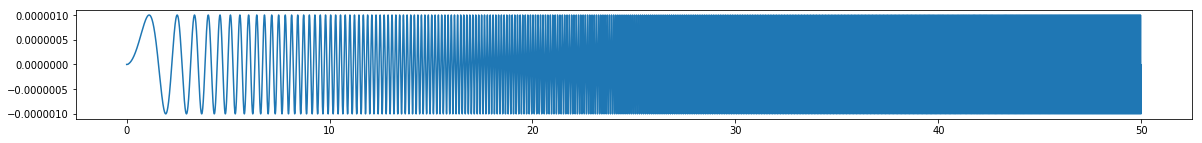

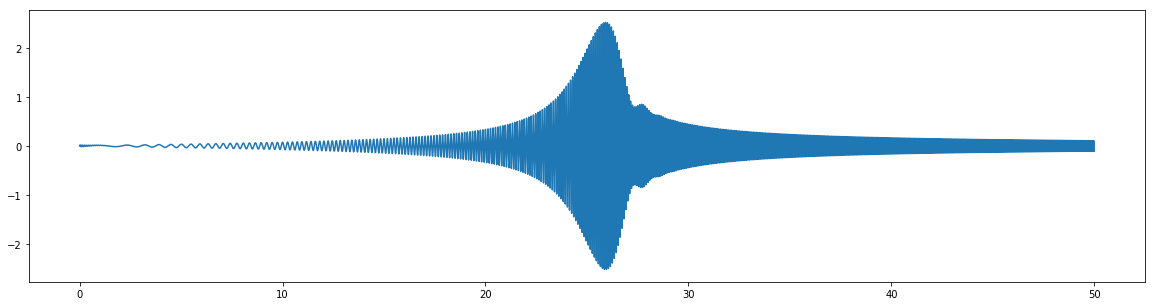

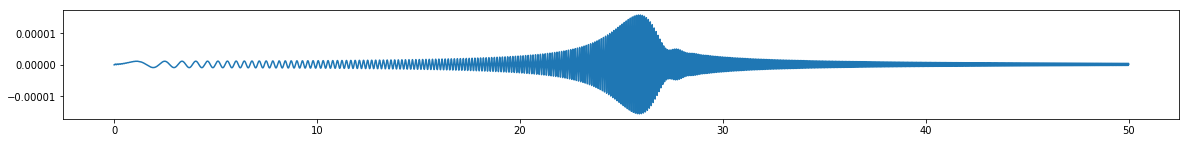

In [30]:
plt.figure(figsize=(20,2))
plt.plot(Sim_t, I)
plt.show()

plt.figure(figsize=(20,5))
plt.plot(Sim_t, Vm)
plt.show()

plt.figure(figsize=(20,2))
plt.plot(Sim_t, I_L)
plt.show()

This behavior in the beginning is due to the Na branch. The Inductor responds to that and differentiates the voltage over time. And of course, for low frequency the inductor branch (inductor + R_L) is dominating. And since the inductor is parallel to the capacitance we see the response.

We can solve this problem by adding the nonlinearity to the Na branch

## Adding nonlinearity with Na

In this case I am adding a nonlinearity that depends on Vm and Resting potential (in this case 0)

In [43]:
I = I_stim * np.ones(Sim_t.shape)  # pA

# slope
slope = fn.gen_slope(init_time=0,
                   end_time= 5,
                   time_points=Sim_t)


I1 = fn.gen_sin(init_time=0,
                freq=1000,
                phase=0,
                time_points=Sim_t)
I2 = fn.gen_sin(init_time=0,
                freq=1001,
                phase=0,
                time_points=Sim_t)

I = slope * I_stim * (I1 + 0)

# Chirp stimulation
# out, freq = fn.gen_chirp(Chirp_init_freq=.01, 
#                          Chirp_init_time=0, 
#                          Chirp_end_freq=20, 
#                          Chirp_end_time=Sim_t[-1], 
#                          time_points=Sim_t)

# I      = slope * I_stim * out  # pA

In [44]:
for i in range(I.shape[0]-1):
    
    #non-linearity
    if I[i] > 0:
        nl = slope[i]
    else:
        nl = 0
    
#     nl = 1
    # current through the leak branch
    I_leak = g_leak * (Vm[i] - V_leak)
    
    # current through the membrane capacitance
    I_Na = g_Na * nl * (Vm[i] - V_Na)
    
    # current through the inductor
    I_L_ss = Vm[i] * g_L
    dILdt = (I_L_ss - I_L[i]) / tau_L
    I_L[i+1] = I_L[i] + dILdt * Sim_dt
    
    
#     I_L[i+1] = 0
#     I_leak = 0
#     I_Na = 0
    
    dVmdt = (I[i] - I_leak - I_Na - I_L[i]) / C
    Vm[i+1] = Vm[i] + dVmdt * Sim_dt

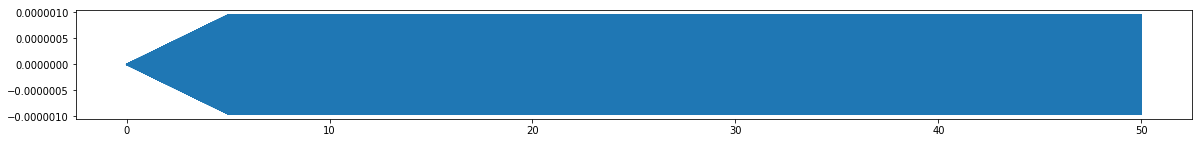

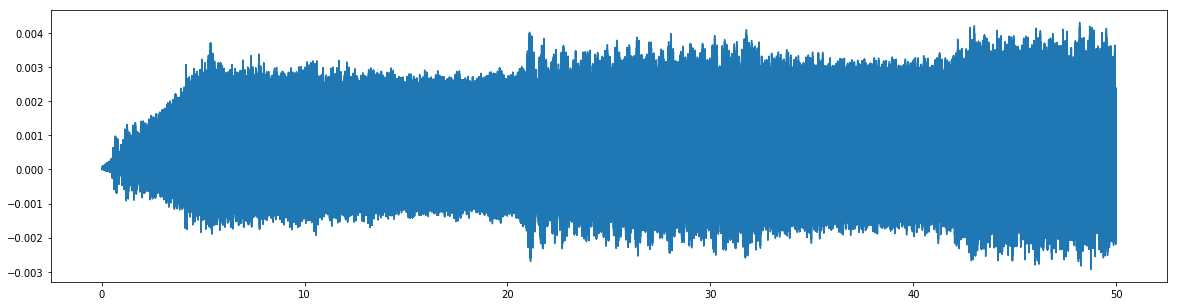

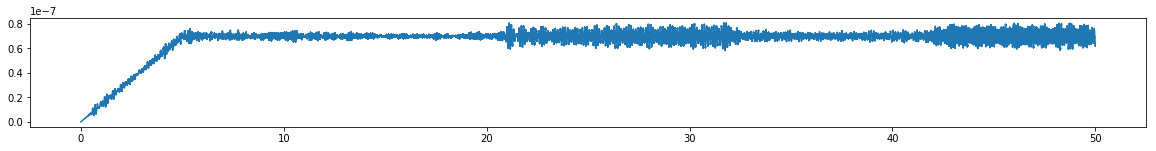

In [45]:
plt.figure(figsize=(20,2))
plt.plot(Sim_t, I)
plt.show()

plt.figure(figsize=(20,5))
plt.plot(Sim_t, Vm)
plt.show()

plt.figure(figsize=(20,2))
plt.plot(Sim_t, I_L)
plt.show()